## Initialization

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.io
from scipy.special import expit
from math import *
from scipy import optimize

In [7]:
sns.set_style('whitegrid')
%matplotlib inline

## Loading Data

In [8]:
mat = scipy.io.loadmat('ex4data1.mat')
X = mat['X']
y = mat['y']
X = np.insert(X,0,1,axis= 1)

In [9]:
m,n = X.shape
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10
_lambda = 1

1- Flatter 2- FeedForward Algorithm 3- Comment gozari baraye size haye matrix

## Function Section

In [115]:
#functions Sections
def magic_display(matrix = None):
    if matrix is None:
        # selecting 100 random rows of the X
        rand_indces = np.random.permutation(m)[0:100]
        X_dis = X[rand_indces]
    else:
        X_dis = matrix
      
    if( len(X_dis.shape) > 1 ): 
        m_test,n_test = X_dis.shape
        axis_bound = 1
    else:
        m_test = 1
        n_test = X_dis.shape[0]
        axis_bound = 0
    
    # each number width , height in plot
    example_width = int(round(sqrt(n_test)))
    example_height = int(round( n_test / example_width ))

    # number of numbers to show in plot
    display_rows = floor(sqrt(m_test))
    display_cols = ceil(m_test / display_rows )

    # padding between numbers
    pad = 2

    # intilazation array for holding previos 100 random numbers
    display_array = np.ones((
                             pad + display_rows * ( example_height + pad ),
                             pad + display_cols * ( example_width + pad )
                            ))
    count = 0;
    
    for i in range(display_rows):
        for j in range(display_cols):
            if( count >= m_test ):
                break

            # max_val of each row in X_dis
            max_val = np.max( X_dis[count : count+1], axis= axis_bound)

            # Starting x,y point of numbers shape in array 
            ex_x_range = pad + ( i ) * ( example_height + pad )
            ex_y_range = pad + ( j ) * ( example_width + pad )
            
            if(m_test > 1):
                ex_arr = X_dis[ count : count + 1 , 1:].reshape(example_height , example_width)
            else:
                ex_arr = X_dis[1:].reshape(example_height , example_width)
                
            # Setting values
            display_array[ ex_x_range : ex_x_range + example_height,
                           ex_y_range : ex_y_range + example_width ] = np.divide(ex_arr , max_val)
            count += 1
    
    # Plotting 100 random data
    plt.figure(figsize=(12,8))

    # Get rod of grid
    plt.grid(False)
    plt.imshow(display_array)

def hyp(matrix):
    return expit(matrix)
    
def neural_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, _lam):
    # initialization some varibles
    if(len(X.shape) > 1):
        axis_bound = 1
    else:
        axis_bound = 0
    
    # reshaping from one dimensional to 2d dimensional parameter vector
    end_indx_theta1 = hidden_layer_size * ( input_layer_size + 1 )
    Theta1 = np.reshape( nn_params[0 : end_indx_theta1 ],
                         ( hidden_layer_size, input_layer_size + 1 ))
    
    # reshaping from one dimensional to 2d dimensional parameter vector
    Theta2 = np.reshape( nn_params[end_indx_theta1 : ],
                        ( num_labels, hidden_layer_size + 1 ))

    # Copmuting hidden level activation
    z_2 = np.dot(X, Theta1.T )
    hidden_activation = hyp( z_2 )
    hidden_activation = np.insert( hidden_activation, 0, 1, axis=axis_bound )
    
    # Copmuting output level activation
    z_3 = np.dot(hidden_activation, Theta2.T)
    out_activation = hyp(z_3)

    # finding hypotesis matrix
    h = out_activation
    
    # Computing Log(sigmoid(x)) for all of the hypotesis elements
    h1 = np.log(h)
    
    # Computing Log( 1 - simgoid(x)) for all of the hypotesis elements
    h2 = np.log(1 - h)
    
    # Creating new matrix for y
    new_y0 = ( y - 1 ).copy()
    new_y1 = np.zeros(out_activation.shape)
    new_y1[np.arange(0,out_activation.shape[0]),new_y0.T] = 1
    
    # Computing Regularization Part Varibles
    Theta1_pow2 = Theta1 * Theta1
    Theta2_pow2 = Theta2 * Theta2

    #Computing Cost of the hypotesis
    J =  ( -1 / m ) * sum(sum( new_y1 * h1 + (1 - new_y1) * h2)) + \
                                        ( _lam / ( 2 * m )) * ( sum(sum( Theta1_pow2 )) + sum(sum( Theta2_pow2 )) )
    
    return J

def neural_gradient_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, _lam):
    # initialization some varibles
    if(len(X.shape) > 1):
        axis_bound = 1
    else:
        axis_bound = 0
    
    # Number of training examples 
    m = X.shape[0]
    
    # reshaping from one dimensional to 2d dimensional parameter vector
    end_indx_theta1 = hidden_layer_size * ( input_layer_size + 1 )
    Theta1 = np.reshape( nn_params[0 : end_indx_theta1 ],
                         ( hidden_layer_size, input_layer_size + 1 ))
    
    # reshaping from one dimensional to 2d dimensional parameter vector
    Theta2 = np.reshape( nn_params[end_indx_theta1 : ],
                        ( num_labels, hidden_layer_size + 1 ))
    
    # Defining Delta's
    Delta1 = np.zeros(Theta1.shape)
    Delta2 = np.zeros(Theta2.shape)

    # Defining Theta_grad Matrixs
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)

    for i in range(m):
        X_input = X[i : i + 1,:]

        # Copmuting hidden level activation
        z_2 = np.dot( X_input, Theta1.T )
        hidden_activation = hyp( z_2 )
        hidden_activation = np.insert( hidden_activation, 0, 1, axis=axis_bound )
        
        # Copmuting output level activation
        z_3 = np.dot( hidden_activation, Theta2.T )
        out_activation = hyp( z_3 )

        # finding hypotesis matrix
        h = out_activation

        # Creating new matrix for y
        new_y0 = ( y - 1 ).copy()
        new_y1 = np.zeros(out_activation.shape[1])
        new_y1[new_y0[i]] = 1

        # Computing erros
        out_error = h - new_y1 

        z_2 = np.insert(z_2, 0, 1, axis=1)
        hidden_error = np.dot( out_error , Theta2 ).T * sigmoid_gradient(z_2).T
        hidden_error = hidden_error[ 1: ]

        # Computing Delta
        
        Delta1 =  Delta1 + np.dot(hidden_error, X_input)
        Delta2 =  Delta2 + np.dot(out_error.T, hidden_activation )
    
    Theta1_grad[:, 0:1 ] = ( 1 / m ) * ( Delta1[:, 0:1 ] )
    Theta1_grad[:, 1:  ] = ( 1 / m ) * ( Delta1[:, 1:  ] ) + ( _lam / m ) * Theta1[:, 1:  ] 
    
    Theta2_grad[:, 0:1 ] = ( 1 / m ) * ( Delta2[:, 0:1 ] )
    Theta2_grad[:, 1:  ] = ( 1 / m ) * ( Delta2[:, 1:  ] ) + ( _lam / m ) * Theta2[:, 1:  ] 
    
    # Converting Weigths to 1 Dimensional Matrix's
    Theta1_grad_flat = np.array(Theta1_grad.flat)
    Theta2_grad_flat = np.array(Theta2_grad.flat)
    
    return np.concatenate((Theta1_grad_flat, Theta2_grad_flat))

def sigmoid_gradient(matrix):
        return hyp(matrix) * ( 1 - hyp(matrix) )

def checking_gradient(_lambda):
    if(_lambda == None):
        _lambda = 0
    
    input_layer_size = 3
    hidden_layer_size = 5
    num_labels = 3
    m = 5
    
    Theta1 = debug_initialaize_weights(hidden_layer_size, input_layer_size)
    Theta2 = debug_initialaize_weights(num_labels, hidden_layer_size)

    X = debug_initialaize_weights(m, input_layer_size - 1)
    y = 1 + np.mod(np.arange(0,m), num_labels)

    # initialization some varibles
    if(len(X.shape) > 1):
        axis_bound = 1
    else:
        axis_bound = 0
    
    # Inserting 1's column to matrix
    X = np.insert( X, 0, 1, axis= axis_bound)

    Theta1_flat = np.array(Theta1.flat)
    Theta2_flat = np.array(Theta2.flat)
    
    Theta = np.concatenate((Theta1_flat, Theta2_flat))

    grad = neural_gradient_function(Theta, input_layer_size, hidden_layer_size, num_labels, X, y, _lambda)
    numerical_grad = numerical_gradinet_function(Theta, input_layer_size, hidden_layer_size, num_labels, X, y, _lambda)
    
    
    print(np.linalg.norm(numerical_grad - grad) / np.linalg.norm(numerical_grad + grad))
    
def numerical_gradinet_function(Theta, input_layer_size, hidden_layer_size, num_labels, X, y, _lambda):
    new_grad = np.zeros(Theta.size)
    p = np.zeros(Theta.size)
    e = 1e-4

    for i in range(Theta.size):
            p[i] = e
            j1 = neural_cost_function(Theta + p, input_layer_size, hidden_layer_size, num_labels, X, y, _lambda)
            j2 = neural_cost_function(Theta - p, input_layer_size, hidden_layer_size, num_labels, X, y, _lambda)
            
            new_grad[i] = (j1 - j2) / ( 2 * e )
            p[i] = 0
            
    return new_grad

def debug_initialaize_weights(output_layer, input_layer):
    
    matrix = np.zeros((output_layer, input_layer + 1))
    
    return np.sin(np.arange(1,matrix.size + 1)).reshape(matrix.shape) / 10

def random_initlize(L_in, L_out):
    # Random Weights
    W = np.zeros((L_out, L_in + 1))
    W = np.random.rand(L_out, L_in + 1 ) * 2 * 0.12 - 0.12
    
    return W
    

In [117]:
checking_gradient(0)

0.998001998002


## Visualizing Data

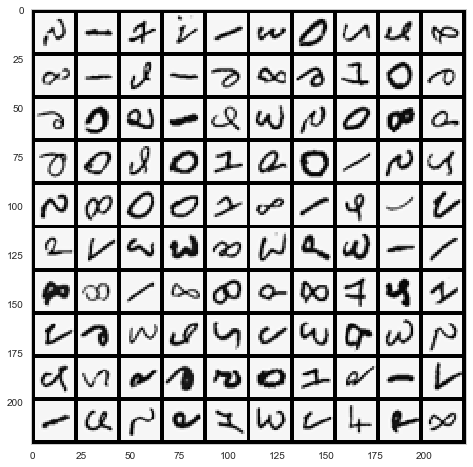

In [91]:
magic_display()

## Feedforward Propagation Algorithm

In [92]:
# Loading Weights
weights = scipy.io.loadmat('ex4weights.mat')
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']

In [93]:
Theta1.shape

(25, 401)

In [94]:
Theta2.shape

(10, 26)

In [95]:
# Converting Weigths to 1 Dimensional Matrix's
Theta1_flat = np.array(Theta1.flat)
Theta2_flat = np.array(Theta2.flat)

# Creating New 1d Matrix for holding all of the weights
Theta = np.concatenate((Theta1_flat, Theta2_flat))

In [96]:
neural_cost_function(Theta, input_layer_size, hidden_layer_size, num_labels, X, y, 3)

0.57820505840604386

## Predecit

In [107]:
initial_theta1 = random_initlize(input_layer_size, hidden_layer_size)
initial_theta2 = random_initlize(hidden_layer_size, num_labels)

initial_theta1_flat = np.array(initial_theta1.flat)
initial_theta2_flat = np.array(initial_theta2.flat)

initial_theta = np.concatenate((initial_theta1_flat, initial_theta2_flat))

In [120]:
result = optimize.fmin_bfgs(f= neural_cost_function,x0= initial_theta,fprime= neural_gradient_function, \
                                    args=(input_layer_size, hidden_layer_size, num_labels, X, y, _lambda), maxiter=1, \
                                    disp=False,full_output=True)

print(result[1])

4.290784420640357
